### Preprocessing

### Import des biblio

In [51]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

#### 


Variables  

 - InvoiceNo: Invoice number. The unique number of each transaction, namely the invoice. Aborted operation if it starts with C.  
 -  StockCode: Product code. Unique number for each product.  
 - Description: Product name  
 - Quantity: Number of products. It expresses how many of the products on the invoices have been sold.  
 - InvoiceDate: Invoice date and time.  
 - UnitPrice: Product price (in GBP)  
 - CustomerID: Unique customer number  
 - Country: The country where the customer lives.  



In [52]:
# Read the XLSX file
df_2010= pd.read_excel("../data/bronze.xlsx", sheet_name="Year 2009-2010")

In [53]:
# Read the XLSX file
df_2011= pd.read_excel("../data/bronze.xlsx", sheet_name="Year 2010-2011")

In [54]:
dfs = [df_2010, df_2011]

In [55]:
df = pd.concat(dfs)

In [56]:
df.head(9)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom


In [57]:
df.shape

(1067371, 8)

In [58]:
df.duplicated().sum()

34335

In [59]:
df[df.duplicated()==True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [60]:
df = df.drop_duplicates()

In [61]:
df.shape

(1033036, 8)

In [62]:
profile = ProfileReport(df, title="Profiling Report")

In [63]:
#profile.to_file('data_report.html')
#the open with live server (click droit)

In [64]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

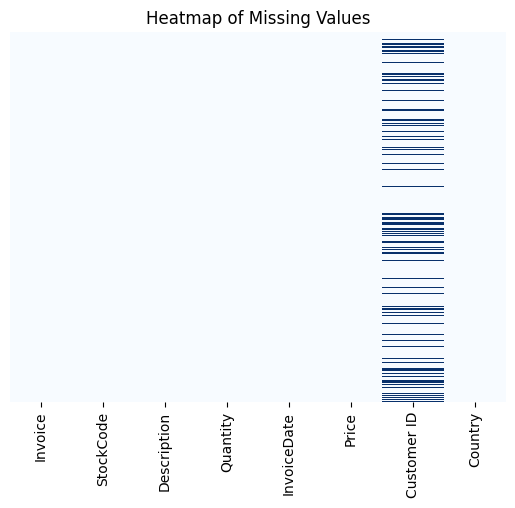

In [65]:
# Create a figure and axes for the plot
fig, ax = plt.subplots()

# Plot a heatmap of missing values in the dataframe
sns.heatmap(df.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="Blues")

# Add a title to the plot
ax.set_title("Heatmap of Missing Values")

# Show the plot
plt.show()

In [66]:
# Supprimer les lignes contenant des valeurs NaN
data_cleaned = df.dropna()

# Afficher un aperçu des premières lignes du dataframe nettoyé
print(data_cleaned.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [67]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797885 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      797885 non-null  object        
 1   StockCode    797885 non-null  object        
 2   Description  797885 non-null  object        
 3   Quantity     797885 non-null  int64         
 4   InvoiceDate  797885 non-null  datetime64[ns]
 5   Price        797885 non-null  float64       
 6   Customer ID  797885 non-null  float64       
 7   Country      797885 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 54.8+ MB


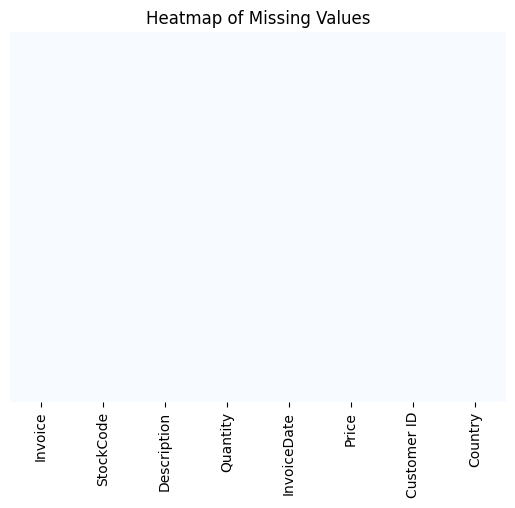

In [68]:
# Create a figure and axes for the plot
fig, ax = plt.subplots()

# Plot a heatmap of missing values in the dataframe
sns.heatmap(data_cleaned.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="Blues")

# Add a title to the plot
ax.set_title("Heatmap of Missing Values")

# Show the plot
plt.show()

In [69]:
data_cleaned.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [70]:
#EXporter la data dans un Csv 
data_cleaned.to_csv('../data/silver.csv', index=False)

In [71]:
data_cleaned.shape

(797885, 8)

In [72]:
data_cleaned.describe()

,Quantity,Price,Customer ID
count,797885.000000,797885.000000,797885.000000
mean,12.602980,3.702732,15313.062777
std,191.670371,71.392549,1696.466663
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13964.000000
50%,5.000000,1.950000,15228.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,38970.000000,18287.000000


In [73]:
data_cleaned["Description"].nunique()

5299

In [79]:
descr_quant = data_cleaned.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False)

In [84]:
descr_quant.head(15)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,103505
WHITE HANGING HEART T-LIGHT HOLDER,88126
ASSORTED COLOUR BIRD ORNAMENT,77755
JUMBO BAG RED RETROSPOT,73033
BROCADE RING PURSE,69343
PACK OF 60 PINK PAISLEY CAKE CASES,54373
60 TEATIME FAIRY CAKE CASES,52502
PACK OF 72 RETRO SPOT CAKE CASES,44480
PACK OF 72 RETROSPOT CAKE CASES,44356


In [82]:
descr_quant.shape

(5299, 1)

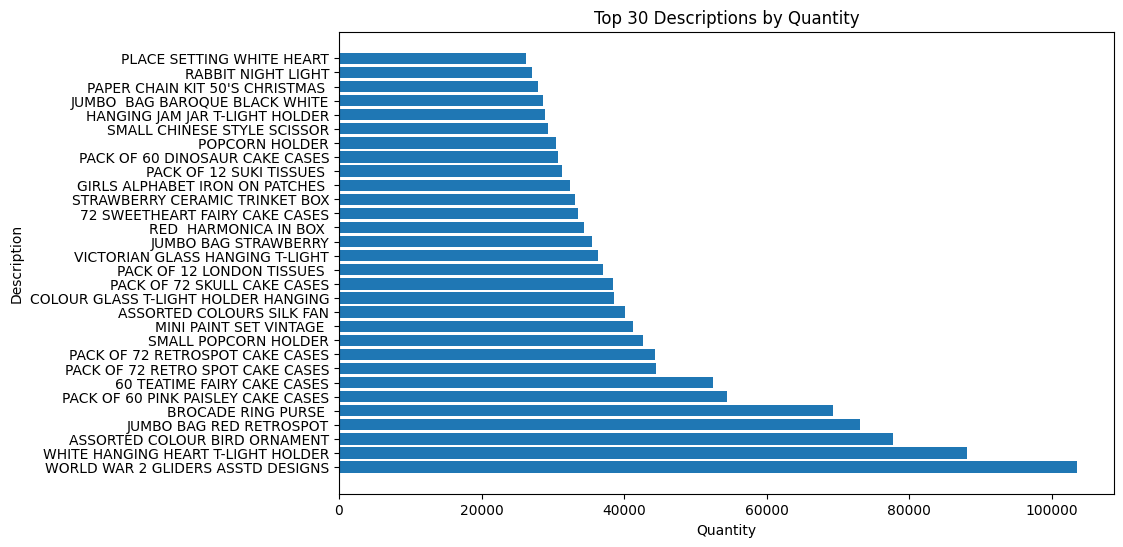

In [88]:
top_n = 30  # Adjust the number of bars to show

top_descriptions = descr_quant.head(top_n)
plt.figure(figsize=(10, 6))
plt.barh(top_descriptions.index, top_descriptions['Quantity'])
plt.xlabel('Quantity')
plt.ylabel('Description')
plt.title('Top {} Descriptions by Quantity'.format(top_n))
plt.show()

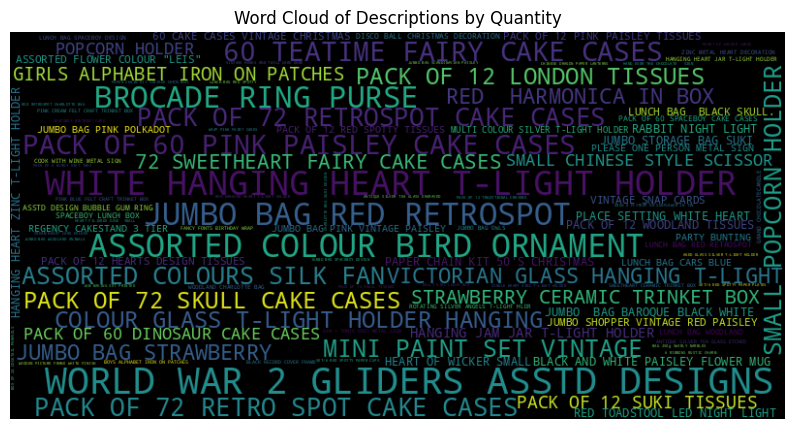

In [89]:
# from wordcloud import WordCloud

# wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(descr_quant['Quantity'])
# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud of Descriptions by Quantity')
# plt.show()

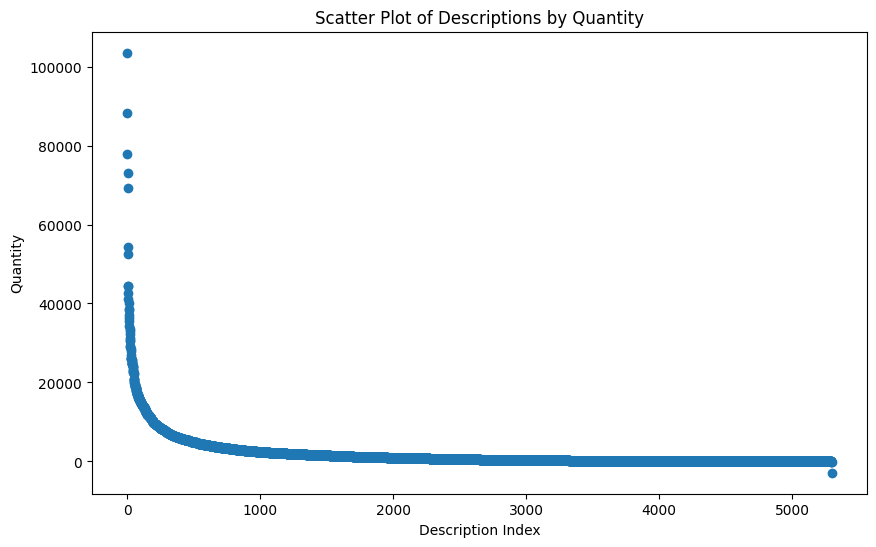

In [92]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(descr_quant)), descr_quant['Quantity'])
plt.xlabel('Description Index')
plt.ylabel('Quantity')
plt.title('Scatter Plot of Descriptions by Quantity')
plt.show()

In [75]:
country_cust_data=data_cleaned[['Country','Customer ID']].drop_duplicates()
country_cust_data.groupby(['Country'])['Customer ID'].aggregate('count').reset_index().sort_values('Customer ID', ascending=False)

,Country,Customer ID
38,United Kingdom,5410
14,Germany,107
13,France,95
32,Spain,41
3,Belgium,29
28,Portugal,24
24,Netherlands,23
34,Switzerland,22
33,Sweden,19
18,Italy,17


In [76]:
## MOdify name contry

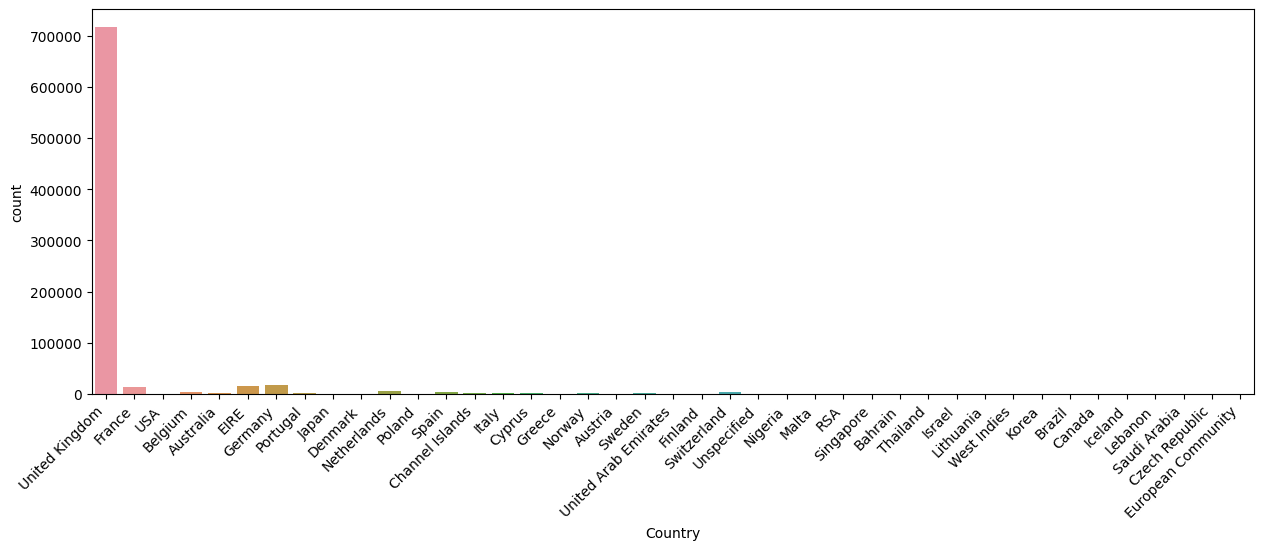

In [78]:
def cat_summary(dataframe, col_name, plot=False):
    if plot:
        fig_dims = (15, 5)
        fig, ax = plt.subplots(figsize=fig_dims)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.xticks(rotation = 45, ha = 'right')
        plt.show()

cat_summary(data_cleaned, "Country", plot=True)